# Setup

## Colab

In [1]:
# Mount the drive and move to dir
from google.colab import drive
drive.mount("/content/drive", force_remount = False)
%cd /content/drive/MyDrive/Coding/spread-res/runscr/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coding/spread-res/runscr


## Imports

In [2]:
# Import importlib to reload modules and sys and os to add the path for other import
import importlib
import os
import sys

import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the model architecture
from classes.models import BertGrid

# Import the utilities and the dataloader
from utils import inferutil, setuputil, trainutil

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertGrid)

# Import the model and funcs required from utils
from classes.models.BertGrid import BertGrid
from utils.inferutil import infer_full, infer_one
from utils.setuputil import display_config, setup_config
from utils.trainutil import train_model

## Configuration

device = cuda/mps:0 (env-specific), threads = 1 to inf (env-specific), seed = 0 to inf, data_dir = ../data, rows = 100, cols = 100, tokens = 32, save_dir = ../models/

In [3]:
# Setup the config
input_config = {
    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertGrid",
    "model_base": "bert-base-cased",
    "data_ds": "50",
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 32,
    "num_hidden_layers": 1,
    "num_attention_heads": 1,
    "intermediate_size": 128,
    # Training Parameters
    "batch_size": 12,
    "lr": 1e-3,
    "mu": 0.25,
    "epochs": 200,
    "patience": 2,
    "save_int": 50,
}
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

Processing files: 100%|██████████| 40/40 [00:08<00:00,  4.64it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 4200.18it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 5314.63it/s]



5(P) = 5(G) + 0(E)

FINAL CONFIG:
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "bert-base-cased",
  "model_name": "BertGrid",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "50",
  "data_dir": "../data",
  "train_dir": "../data/50_train",
  "val_dir": "../data/50_val",
  "test_dir": "../data/50_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 32,
  "num_hidden_layers": 1,
  "num_attention_heads": 1,
  "intermediate_size": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 12,
  "lr": 0.001,
  "mu": 0.25,
  "epochs": 200,
  "patience": 2,
  "save_i

# Model Training

In [4]:
# Create and observe the model
untrained_model = BertGrid(config).to(DEVICE)
print(untrained_model)

BertGrid(
  (bertModel_cell): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 32, padding_idx=0)
      (position_embeddings): Embedding(64, 32)
      (token_type_embeddings): Embedding(2, 32)
      (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=32, out_features=32, bias=True)
              (key): Linear(in_features=32, out_features=32, bias=True)
              (value): Linear(in_features=32, out_features=32, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=32, out_features=32, bias=True)
              (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
   

## Training Metrics

1. GPU Model: 521 mb
2. GPU Training: 31.2 gb

3. Per Epoch Train Time: 2s
4. Per Epoch Val Time: \<1s


In [5]:
# Train with adjusted batch size
trained_model = train_model(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


Train Loss: 1.3706e+00, Val Loss: 1.6552e+00


Epoch 1


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]


Train Loss: 1.2233e+00, Val Loss: 1.5561e+00


Epoch 2


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Train Loss: 1.3180e+00, Val Loss: 1.4816e+00


Epoch 3


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Train Loss: 1.1481e+00, Val Loss: 1.4329e+00


Epoch 4


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]


Train Loss: 1.1152e+00, Val Loss: 1.3883e+00


Epoch 5


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 1.0832e+00, Val Loss: 1.3560e+00


Epoch 6


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 1.3118e+00, Val Loss: 1.3150e+00


Epoch 7


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


Train Loss: 1.0848e+00, Val Loss: 1.2806e+00


Epoch 8


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]


Train Loss: 1.1307e+00, Val Loss: 1.2422e+00


Epoch 9


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]


Train Loss: 1.1205e+00, Val Loss: 1.2060e+00


Epoch 10


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]


Train Loss: 1.1091e+00, Val Loss: 1.1705e+00


Epoch 11


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 9.8704e-01, Val Loss: 1.1412e+00


Epoch 12


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 9.7031e-01, Val Loss: 1.1047e+00


Epoch 13


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 8.7159e-01, Val Loss: 1.0794e+00


Epoch 14


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 9.4764e-01, Val Loss: 1.0384e+00


Epoch 15


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Train Loss: 8.7336e-01, Val Loss: 9.9890e-01


Epoch 16


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


Train Loss: 9.3024e-01, Val Loss: 9.6316e-01


Epoch 17


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 7.9014e-01, Val Loss: 9.2950e-01


Epoch 18


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 7.4846e-01, Val Loss: 8.9629e-01


Epoch 19


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 7.3108e-01, Val Loss: 8.6174e-01


Epoch 20


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


Train Loss: 7.3309e-01, Val Loss: 8.2102e-01


Epoch 21


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


Train Loss: 7.0070e-01, Val Loss: 7.8525e-01


Epoch 22


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]


Train Loss: 6.5053e-01, Val Loss: 7.5432e-01


Epoch 23


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]


Train Loss: 6.9272e-01, Val Loss: 7.2142e-01


Epoch 24


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]


Train Loss: 6.3054e-01, Val Loss: 6.9514e-01


Epoch 25


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]


Train Loss: 6.2049e-01, Val Loss: 6.6779e-01


Epoch 26


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


Train Loss: 6.7860e-01, Val Loss: 6.4431e-01


Epoch 27


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 6.6166e-01, Val Loss: 6.2545e-01


Epoch 28


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]


Train Loss: 5.4361e-01, Val Loss: 6.0535e-01


Epoch 29


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Train Loss: 5.1159e-01, Val Loss: 5.8828e-01


Epoch 30


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 5.6514e-01, Val Loss: 5.7031e-01


Epoch 31


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Train Loss: 4.9013e-01, Val Loss: 5.5605e-01


Epoch 32


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


Train Loss: 5.2314e-01, Val Loss: 5.4114e-01


Epoch 33


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 5.4890e-01, Val Loss: 5.2908e-01


Epoch 34


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 4.5098e-01, Val Loss: 5.1739e-01


Epoch 35


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]


Train Loss: 4.5325e-01, Val Loss: 5.0601e-01


Epoch 36


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 4.9906e-01, Val Loss: 4.9496e-01


Epoch 37


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


Train Loss: 5.1447e-01, Val Loss: 4.8564e-01


Epoch 38


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


Train Loss: 4.4243e-01, Val Loss: 4.7638e-01


Epoch 39


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 4.5921e-01, Val Loss: 4.6701e-01


Epoch 40


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 4.6170e-01, Val Loss: 4.5889e-01


Epoch 41


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 3.9897e-01, Val Loss: 4.5046e-01


Epoch 42


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 4.4930e-01, Val Loss: 4.4373e-01


Epoch 43


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]


Train Loss: 4.1381e-01, Val Loss: 4.3570e-01


Epoch 44


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


Train Loss: 4.3027e-01, Val Loss: 4.2788e-01


Epoch 45


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]


Train Loss: 3.9229e-01, Val Loss: 4.2092e-01


Epoch 46


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]


Train Loss: 3.8919e-01, Val Loss: 4.1371e-01


Epoch 47


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 3.7503e-01, Val Loss: 4.0744e-01


Epoch 48


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 4.3788e-01, Val Loss: 4.0240e-01


Epoch 49


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 4.0452e-01, Val Loss: 3.9642e-01

Model Saved

Epoch 50


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


Train Loss: 3.5521e-01, Val Loss: 3.9083e-01


Epoch 51


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Train Loss: 4.0381e-01, Val Loss: 3.8588e-01


Epoch 52


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]


Train Loss: 4.0295e-01, Val Loss: 3.8062e-01


Epoch 53


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 3.6503e-01, Val Loss: 3.7657e-01


Epoch 54


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 3.4577e-01, Val Loss: 3.7150e-01


Epoch 55


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


Train Loss: 3.3629e-01, Val Loss: 3.6747e-01


Epoch 56


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 4.0422e-01, Val Loss: 3.6316e-01


Epoch 57


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 3.4227e-01, Val Loss: 3.5863e-01


Epoch 58


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 3.1284e-01, Val Loss: 3.5514e-01


Epoch 59


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 3.4972e-01, Val Loss: 3.5094e-01


Epoch 60


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 3.1732e-01, Val Loss: 3.4717e-01


Epoch 61


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]


Train Loss: 3.2093e-01, Val Loss: 3.4342e-01


Epoch 62


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]


Train Loss: 3.2722e-01, Val Loss: 3.3985e-01


Epoch 63


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]


Train Loss: 3.3855e-01, Val Loss: 3.3698e-01


Epoch 64


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 2.9031e-01, Val Loss: 3.3305e-01


Epoch 65


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


Train Loss: 2.9935e-01, Val Loss: 3.2812e-01


Epoch 66


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 2.8916e-01, Val Loss: 3.2413e-01


Epoch 67


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 2.9164e-01, Val Loss: 3.2287e-01


Epoch 68


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 3.0841e-01, Val Loss: 3.1921e-01


Epoch 69


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


Train Loss: 2.8725e-01, Val Loss: 3.1662e-01


Epoch 70


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 2.9654e-01, Val Loss: 3.1538e-01


Epoch 71


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Train Loss: 2.8870e-01, Val Loss: 3.1056e-01


Epoch 72


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]


Train Loss: 2.9498e-01, Val Loss: 3.0786e-01


Epoch 73


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]


Train Loss: 2.8128e-01, Val Loss: 3.0487e-01


Epoch 74


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 3.4762e-01, Val Loss: 3.0256e-01


Epoch 75


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 2.7075e-01, Val Loss: 2.9966e-01


Epoch 76


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


Train Loss: 2.8404e-01, Val Loss: 2.9753e-01


Epoch 77


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 2.6072e-01, Val Loss: 2.9431e-01


Epoch 78


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 2.6274e-01, Val Loss: 2.9257e-01


Epoch 79


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Train Loss: 2.7633e-01, Val Loss: 2.9063e-01


Epoch 80


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 2.5281e-01, Val Loss: 2.8891e-01


Epoch 81


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 2.3797e-01, Val Loss: 2.8870e-01


Epoch 82


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 2.8048e-01, Val Loss: 2.8616e-01


Epoch 83


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 2.7372e-01, Val Loss: 2.8602e-01


Epoch 84


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]


Train Loss: 2.5099e-01, Val Loss: 2.8640e-01


Epoch 85


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

Train Loss: 2.5657e-01, Val Loss: 2.8989e-01


EARLY STOPPING at epoch 85, best epoch 83
Train Loss = 2.7372e-01, Val Loss = 2.8602e-01


TRAINING DONE at epoch 85, best epoch 83
Train Loss = 0.2737166993319988, Perplexity = 1.000002280975096
Val Loss = 0.2860175371170044, Perplexity = 1.0000023834823164


# Evaluation

In [14]:
# Params
loc = 0
thresh = 0.89
infer_batch_size = batch_size

## Single Example


Filename: ../data/50_train/5%20ORD-013745%20CTD%20Chemical-gene%20interactions.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(0,0): 0.886744 | (2,3): 0.890162 | (2,2): 0.890193 | (2,1): 0.890606 | (2,4): 0.890801 | (2,0): 0.891156 | (2,6): 0.891205 | (2,5): 0.891467

NB to B ratio: Predicted = 9992:8 | Actual = 9992:8
Accuracy: 99.98% | Precision: 87.50% | Recall: 87.50% | F1-Score: 0.88



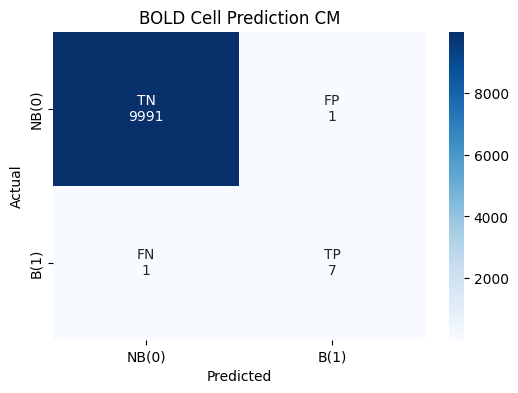


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6
2,1,1,1,1,1,1,1
16,1,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
2,1,1,1,1,1,1,1


In [15]:
# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=train_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/50_val/LMDI_Combined.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
No bold cells in the actual data.

NB to B ratio: Predicted = 9996:4 | Actual = 10000:0
Accuracy: 99.96% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



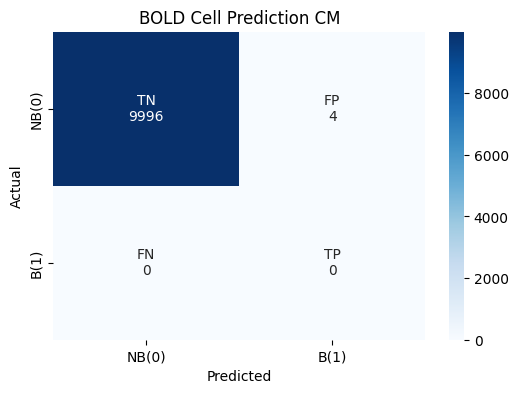


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0
6,1
14,1
15,1
16,1



--- Actual Grid (1 = Bold, 0 = Not Bold) ---
No bold cells in actual data.


In [16]:
# Inference on single position of val_loader
infer_one(
    trained_model=trained_model,
    infer_loader=val_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/50_test/retrospective-review-plan-report-20150317.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(0,0): 0.539659 | (0,8): 0.888726 | (0,9): 0.888851 | (0,1): 0.888964 | (0,11): 0.889056 | (0,10): 0.889084 | (0,7): 0.889501 | (0,6): 0.890014 | (0,2): 0.890173 | (0,3): 0.891249 | (0,5): 0.891422 | (0,4): 0.891699

NB to B ratio: Predicted = 9951:49 | Actual = 9988:12
Accuracy: 99.49% | Precision: 10.20% | Recall: 41.67% | F1-Score: 0.16



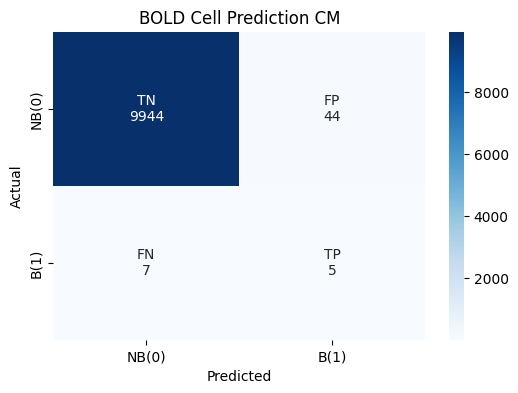


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,10
0,0,0,1,1,1,1,1,0,0
1,0,0,1,1,1,0,0,0,1
2,1,1,0,0,0,0,0,1,0
3,1,1,0,0,0,0,0,1,0
4,1,1,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0
6,1,1,1,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0
11,0,1,1,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,1,1,1,1,1,1,1,1


In [17]:
# Inference on single position of test_loader
infer_one(
    trained_model=trained_model,
    infer_loader=test_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)

## All Examples

Batch Inference: 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 399549:451 | Actual = 399199:801
Accuracy: 99.80% | Precision: 45.77% | Recall: 28.75% | F1-Score: 0.35



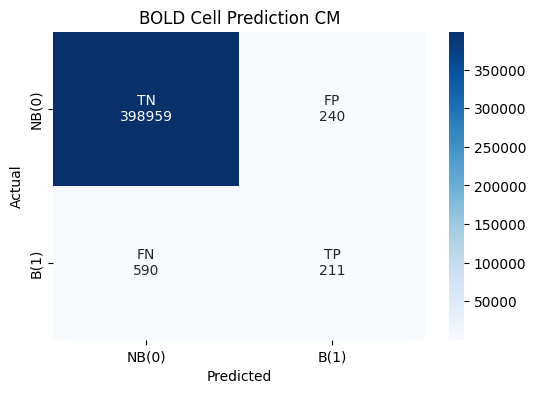

In [18]:
# Infer across all examples of train_loader
infer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49930:70 | Actual = 49846:154
Accuracy: 99.75% | Precision: 70.00% | Recall: 31.82% | F1-Score: 0.44



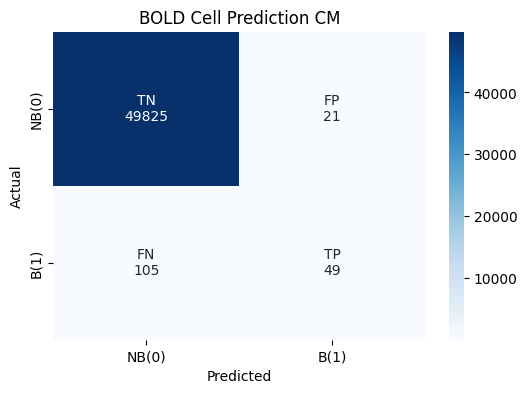

In [19]:
# Infer across all examples of val_loader
infer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49858:142 | Actual = 49801:199
Accuracy: 99.52% | Precision: 35.92% | Recall: 25.63% | F1-Score: 0.30



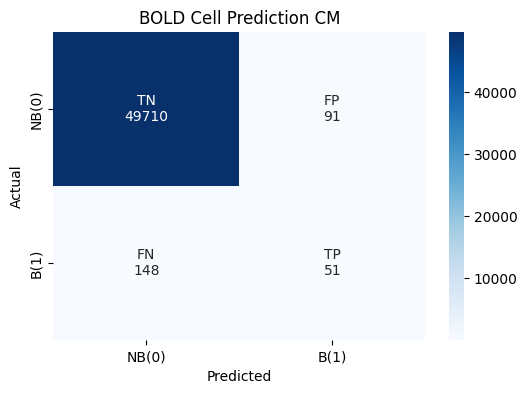

In [20]:
# Infer across all examples of test_loader
infer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)